In [168]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
 

In [170]:
#Getting a dataframe of the csv file
student_list = pd.read_csv('Student_List_A2.csv')
#Checking dataframe is correct by using head()
student_list.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,1
1,1003,15,4.210570,26,2,0.112602,4
2,1004,17,10.028829,14,3,2.054218,3
3,1005,17,4.672495,17,3,1.288061,4
4,1006,18,8.191219,0,1,3.084184,1


In [171]:
# Using replace to replace values in GradeClass 
student_list.GradeClass = student_list.GradeClass.replace({0:'A', 1:'B', 2:'C', 3:'D', 4:'F'})


In [173]:
#Using the median to replace missing values identified in StudyTimeWeekly column
median_study_time = student_list.StudyTimeWeekly.median()
#Returns 9.513100618 as median, thus this will replace missing values
student_list['StudyTimeWeekly'] = student_list['StudyTimeWeekly'].fillna(median_study_time)

In [174]:
#Checking that first missing value is now replaced
student_list.StudyTimeWeekly[19]

9.513100618

There is a negative absence 

In [176]:
#Capturing rows with negative absences using filter
absence_filter = student_list.Absences < 0 
student_list[absence_filter]

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
1001,2003,15,0.806505,-122,3,3.20171,B


In [177]:
#Then removing that row from dataframe 
negative_absence = student_list[absence_filter]
#Using drop() to remove row
student_list.drop(negative_absence.index, inplace=True)

In [178]:
#Checking that the row is deleted
absence_filter = student_list.Absences < 0 
student_list[absence_filter]


,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass


Row is deleted so we fixed this data quality issue 

In [180]:
student_list.GradeClass.describe()

count     2099
unique       5
top          F
freq      1065
Name: GradeClass, dtype: object

In [181]:
#Fixing inconsistent entries of data noticed when observing the csv file. Using round() to convert each GPA into 6 decimal places
student_list.GPA = student_list.GPA.apply(lambda x: round(x, 6))
#Checking that GPA of particular student is now 9 decimal places
student_list.StudentID[1559]
student_list.GPA[1559]


1.615572

A2. Supervised Learning

1. Supervised machine learning essentially trains an algorithm by allowing it to learn the relationship between input and output, thus allowing the algorithm to predict outcomes and recognise patterns. This is achieved with the use of labelled data, which is a data that contains a lot of examples of features and target that is where features represents the input and target represents the output. Thus, the algorithm actively learns to predict the output when given the input objects by creating a model that captures these relationships. The data set that includes the known features and correct targets used to train the algorithm to discover input-output relationships and to thus make predictions is called the training dataset. When an algorithm is trained, another set which is not used in training is employed to predict the performance of the algorithm, that is assess whether it made the correct predictions. This dataset is called the testing dataset.

2. To obtain the features, I used list comprehension to obtain every column except for StudentID and GPA. Getting the label involved using iloc() to get the 6th column which was GradeClass.

3. Splitting data required the use of train_test_split function where we set test_size to 0.2 to ensure that 80% of data is kept for training. Random state = 42 was used as default one used across machine learning communities.  

In [183]:
#Separating features and label of data so we can create a model that predicts which grade class a student lies in
#Using list comprehension to ensure we don't include StudentId and GPA values as Id not a useful predictor and GPA is translated to grade class
Features = student_list.iloc[:, [i for i in range(student_list.shape[1]) if i not in [0,5,6]]].values
label = student_list.iloc[:, 6].values

In [184]:
Features

array([[18.        , 15.40875606,  0.        ,  1.        ],
       [15.        ,  4.21056977, 26.        ,  2.        ],
       [17.        , 10.02882947, 14.        ,  3.        ],
       ...,
       [16.        ,  6.80549965, 20.        ,  2.        ],
       [16.        , 12.41665266, 17.        ,  2.        ],
       [16.        , 17.81990749, 13.        ,  2.        ]])

In [185]:
#Splitting data for training and testing using train_test_split from sklearn.model_selection, 20% of data used for testing
Features_train, Features_test, label_train, label_test = train_test_split(Features, label, test_size=0.2, random_state=42)

In [186]:
#Checking if data is split
len(Features_train)

1679

In [187]:
Features_train

array([[18.        ,  3.40305282, 14.        ,  2.        ],
       [18.        , 11.87411566, 27.        ,  4.        ],
       [15.        , 16.79996446, 27.        ,  2.        ],
       ...,
       [16.        ,  8.36898994,  1.        ,  0.        ],
       [17.        ,  8.87199403,  9.        ,  2.        ],
       [15.        , 17.10218844,  7.        ,  1.        ]])

A3. Classification(training)

1a) With raw data, the range of values varies and thus there can be a large range of values. Normalisation is a process to bring all values of data to a similar scale, ensuring there are no outliers which dominates a model's overall performance. As no larger values are able to influence a model's predictive capabilities, the result is a faster convergence to a more accurate prediction which is evidence of reaching the optimal solution quicker. Thus, normalisation can be considered to be a necessary check to ensure the model is accurate in its predictions. 

1b) Since I will need to use a support vector machine which assumes data is normally distributed it, StandardScaler() will be used, which scales features so they have a mean of 0 and a standard deviation of 1

2a) A support vector machine algorithm aims to find the optimal hyperplane in high-dimensional space, where a hyperplane is a boundary that separates data from different classes.  When being trained, the algorithm aims to find the hyperplane that maximises the margin, which is the distance between closest data point of a class to the hyperplane. This is the aim as a maximised margin means that classes of data are more distinct which makes it easier for the model to predict which class a specific data point should fall in. Thus, SVMs are commonly used in classification. 

2b) If we cannot draw a single linear line that separates the data into two distinct classes, then we call this dataset non-linear. Thus, we need to convert this lower dimension space into a higher one that allows us to find a hyperplane that separates the data into classes. Doing this is achieved with certain functions called kernels. Kernels map the input data into high dimensional space that makes the data separable without having to directly calculate the coordinates of each point in this higher dimension. Thus, kernels make the algorithm more effective by allowing it the algorithm to classify more complex datasets. 

2c) Code for predictive SVM model is found below and begins with inline comment that says "Code to build a predictive SVM model".

3) A decision tree classifier is used for the repeat of tasks. 


In [189]:
#Using StandardScaler() to normalise data to a similar scale ensuring faster convergence to more accurate prediction so no outliers dominate model's overall performance
# StandardScaler() used as use of support vector machine algorithm assumes data is normally distributed 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Features_train = sc.fit_transform(Features_train)
Features_test = sc.transform(Features_test)



In [190]:
#Code to build a predictive SVM model
from sklearn import svm

In [191]:
#Initialising a linear SVM classifier
SVM_classifier = svm.SVC(kernel='linear', class_weight='balanced') #Making it balanced so F grades don't make model bias

In [192]:
#Training the classifier with training sets
SVM_classifier.fit(Features_train, label_train)

SVC(class_weight='balanced', kernel='linear')

In [193]:
#Using decision tree algorithm to predict grade
#Importing DecisionTreeClassifier so we can use the algorithm
from sklearn.tree import DecisionTreeClassifier

In [194]:
DTC_classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
DTC_classifier.fit(Features_train, label_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [195]:
# Code for predicting aspect of Classification

SVM_predictor = SVM_classifier.predict(Features_test)
DTC_predictor = DTC_classifier.predict(Features_test)

In [196]:
#Creating confusion matrices to measure models' performance
from sklearn.metrics import confusion_matrix
SVM_cm = confusion_matrix(label_test, SVM_predictor)
SVM_cm

array([[  6,   4,   1,   2,   0],
       [ 17,  12,   7,   5,   6],
       [ 16,  14,  24,  12,   3],
       [  7,   1,  11,  41,   6],
       [  0,   0,   0,  23, 202]])

In [197]:
DTC_cm = confusion_matrix(label_test, DTC_predictor)
DTC_cm

array([[  4,   3,   4,   1,   1],
       [  6,  12,  18,   4,   7],
       [  2,   9,  33,  20,   5],
       [  1,   5,  17,  26,  17],
       [  6,   4,  14,  12, 189]])

In [198]:
label_test

array(['B', 'D', 'F', 'F', 'F', 'F', 'F', 'C', 'F', 'F', 'D', 'F', 'F',
       'C', 'F', 'A', 'D', 'C', 'F', 'F', 'C', 'C', 'F', 'F', 'F', 'B',
       'D', 'F', 'B', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'C', 'F', 'B',
       'F', 'A', 'F', 'F', 'F', 'B', 'D', 'C', 'C', 'F', 'B', 'A', 'F',
       'C', 'C', 'F', 'F', 'C', 'F', 'F', 'C', 'F', 'F', 'B', 'F', 'C',
       'B', 'F', 'B', 'F', 'C', 'C', 'F', 'F', 'F', 'F', 'D', 'C', 'F',
       'D', 'B', 'B', 'D', 'F', 'F', 'C', 'F', 'D', 'C', 'F', 'D', 'F',
       'F', 'F', 'C', 'F', 'F', 'F', 'B', 'F', 'F', 'D', 'B', 'F', 'C',
       'D', 'F', 'F', 'C', 'B', 'D', 'F', 'F', 'F', 'F', 'A', 'F', 'D',
       'F', 'F', 'F', 'D', 'F', 'F', 'F', 'F', 'D', 'C', 'C', 'D', 'B',
       'F', 'F', 'F', 'C', 'C', 'F', 'F', 'F', 'B', 'F', 'A', 'D', 'F',
       'D', 'F', 'B', 'B', 'F', 'F', 'F', 'B', 'F', 'F', 'F', 'D', 'F',
       'F', 'F', 'F', 'F', 'C', 'F', 'C', 'F', 'B', 'D', 'D', 'F', 'D',
       'D', 'F', 'D', 'D', 'F', 'F', 'C', 'C', 'F', 'A', 'F', 'F

In [199]:
# Getting classification_report for both models 
from sklearn.metrics import classification_report
data_table = classification_report(label_test, SVM_predictor, target_names = ['A', 'B', 'C', 'D', 'F'], zero_division=0, output_dict=True)
svm_report = pd.DataFrame(data_table).transpose()
svm_report

,precision,recall,f1-score,support
A,0.130435,0.461538,0.203390,13.000000
B,0.387097,0.255319,0.307692,47.000000
C,0.558140,0.347826,0.428571,69.000000
D,0.493976,0.621212,0.550336,66.000000
F,0.930876,0.897778,0.914027,225.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.500105,0.516735,0.480803,420.000000
weighted avg,0.715358,0.678571,0.687275,420.000000


In [200]:
treetable = classification_report(label_test, DTC_predictor, target_names = ['A', 'B', 'C', 'D', 'F'], zero_division=0, output_dict=True)
tree_report = pd.DataFrame(treetable).transpose()
tree_report

,precision,recall,f1-score,support
A,0.210526,0.307692,0.250000,13.000000
B,0.363636,0.255319,0.300000,47.000000
C,0.383721,0.478261,0.425806,69.000000
D,0.412698,0.393939,0.403101,66.000000
F,0.863014,0.840000,0.851351,225.000000
accuracy,0.628571,0.628571,0.628571,0.628571
macro avg,0.446719,0.455042,0.446052,420.000000
weighted avg,0.637430,0.628571,0.630689,420.000000


Performance Comparision of Models

To compare the performance of SVM and the decision tree classifier, we must consider the classification metrics of accuracy, precision, sensitivity. Consideration of these metrics will allow us to form a contention on the better overall model. Producing these results was done efficiently using a module from sklearn.metrics called classification_report which returns precision, recall values for each grade class. Macro average and a weighted average are also given where macro gives equal importance to all classes, whilst weighted gives more importance to those grades that appear more often. In terms of overall accuracy, which measures how often the prediction is correct, the SVM model performing better recording 75% accuracy compared to the DTC's 63%. Assessing precision, which measures how often predicton is correct when positive value predicted, as well as sensitivity which measures how often prediction is positive when actual result is positive, will be done using both the macro and weighted averages. Thus with the SVM, the macro-average for precision was 51.6% compared to the decision tree's 44.7% whilst weighted values were 71.5% and 63.7% respectively. The decision tree model was only more precise with the minority A grade, but less precise with every other grade. Regarding sensitivity or recall, SVM again performed better recording higher macro and weighted avgs of 50.8% and 75% respectively compared to decision-tree's percentage values of 45.5% and 62.9%. Similarly to the precision values, decision_tree model performs better with validating A values since SVM fails to predict at all. Overall, SVM model is a more balanced model as evidenced with its better averages, and performs better in most cases of precision and sensitivity. Compounded with better accuracy makes it the superior model in terms of performance.
   

A5. Independent evaluation 

1. The SVM model is used to predict GradeClass

2. Creating the CSV was done by initially creating a dataframe and assigning StudentID to all studentIDs from the initial csv file Submission. Additionally, values for grade_class columns was assigned with the array of predictions that SVM model undertook, which is called submission_predictions. Converting the file to a csv was achieved using to_csv() function from pandas.
   

In [203]:
#Using better SVM model to predict gradeclass of a new dataset which does not have a GradeClass column  
submission = pd.read_csv('Student_List_A2_Submission.csv')
submission.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport
0,5000,16,13.274090,27,1
1,5001,17,16.926360,6,2
2,5002,15,4.225258,15,3
3,5003,16,18.839829,17,3
4,5004,15,9.075075,6,2


In [204]:
#Checking if any negative absences
filter = submission.Absences < 0
submission[filter] #Output below shows none 

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport


In [205]:
#Checking if any NAN values
submission.isnull().sum()

StudentID          0
Age                0
StudyTimeWeekly    0
Absences           0
ParentalSupport    0
dtype: int64

In [206]:
#In terms of wrangling, only issue is inconsistency in presentation given number of decimal places so will resolve that considering
# Necessary wrangling steps will be completed 
submission.StudyTimeWeekly = submission.StudyTimeWeekly.apply(lambda x: round(x, 6))

In [207]:
#Creating features for new csv file
new_features = submission.drop(['StudentID'], axis=1)
new_features.head()

,Age,StudyTimeWeekly,Absences,ParentalSupport
0,16,13.274090,27,1
1,17,16.926360,6,2
2,15,4.225258,15,3
3,16,18.839829,17,3
4,15,9.075075,6,2


In [208]:
new_features = sc.transform(new_features)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [209]:
#Code for predictions
submission_predictions = SVM_classifier.predict(new_features)
submission_predictions

array(['F', 'A', 'D', 'D', 'C', 'A', 'A', 'F', 'C', 'F', 'F', 'F', 'D',
       'B', 'F', 'B', 'F', 'D', 'D', 'C', 'F', 'D', 'A', 'A', 'F', 'F',
       'A', 'F', 'F', 'F', 'D', 'F', 'B', 'F', 'F', 'C', 'B', 'F', 'F',
       'D', 'F', 'F', 'C', 'A', 'F', 'D', 'B', 'F', 'C', 'F', 'A', 'C',
       'F', 'F', 'A', 'F', 'D', 'F', 'F', 'F', 'F', 'C', 'B', 'D', 'D',
       'F', 'F', 'F', 'F', 'D', 'C', 'F', 'F', 'D', 'F', 'A', 'F', 'F',
       'A', 'F', 'C', 'A', 'F', 'A', 'F', 'A', 'C', 'B', 'F', 'F', 'A',
       'F', 'F', 'D', 'A', 'F', 'D', 'F', 'F', 'F', 'C', 'C', 'F', 'D',
       'F', 'D', 'C', 'F', 'D', 'F', 'D', 'F', 'C', 'F', 'F', 'F', 'A',
       'D', 'F', 'A', 'F', 'D', 'B', 'D', 'F', 'F', 'A', 'F', 'F', 'D',
       'F', 'A', 'A', 'F', 'C', 'B', 'A', 'F', 'F', 'F', 'F', 'D', 'D',
       'A', 'F', 'F', 'F', 'F', 'F', 'F', 'D', 'F', 'A', 'D', 'F', 'D',
       'D', 'F', 'F', 'A', 'F'], dtype=object)

In [210]:
submitted_CSV_dataframe = pd.DataFrame({'StudentID': submission['StudentID'], 'GradeClass': submission_predictions })
submitted_CSV_dataframe.head()

,StudentID,GradeClass
0,5000,F
1,5001,A
2,5002,D
3,5003,D
4,5004,C


In [211]:
#Converting to CSV 
submitted_CSV_dataframe.to_csv('GradeClass_Predictions.csv', index=False)

In [213]:
# Getting a csv of the dataset, k-means clustering will be applied to this dataset
movie_frame = pd.read_csv('IMBD.csv')
#Reading first 5 rows to gather any inconsistencies which are fixed with data wrangling 
movie_frame.head()

,movie,genre,runtime,certificate,rating,stars,description,votes,director
0,The Witcher,"Action, Adventure, Drama",60 min,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...","5,39,085",NaN
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163 min,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,"1,06,759",['Christopher McQuarrie']
2,Sound of Freedom,"Action, Biography, Drama",131 min,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,"41,808",['Alejandro Monteverde']
3,Secret Invasion,"Action, Adventure, Drama",47 min,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,"40,536",NaN
4,Special Ops: Lioness,"Action, Drama, Thriller",NaN,NaN,7.5,"['Zoe Saldana, ', 'Laysla De Oliveira, ', 'Dav...",Joe attempts to balance her personal and profe...,"3,203",NaN


In [214]:
#Removing min from runtime column to make it a float
movie_frame['runtime'] = pd.to_numeric(movie_frame['runtime'].str.replace(' min', '').str.replace(',', ''), errors='coerce')
movie_frame['votes'] = pd.to_numeric(movie_frame['votes'].str.replace(',', ''), errors='coerce')
movie_frame['runtime'].head() #Terminal tells me some values have commas thus we need to clean data by first removing them



0     60.0
1    163.0
2    131.0
3     47.0
4      NaN
Name: runtime, dtype: float64

In [215]:
#Removing NAN values of runtime and votes 
movie_frame = movie_frame.dropna(subset=['votes', 'runtime'])
movie_frame.reset_index(drop=True, inplace=True)
movie_frame.head()

 

,movie,genre,runtime,certificate,rating,stars,description,votes,director
0,The Witcher,"Action, Adventure, Drama",60.0,A,8.1,"['Henry Cavill, ', 'Freya Allan, ', 'Anya Chal...","Geralt of Rivia, a solitary monster hunter, st...",539085.0,NaN
1,Mission: Impossible - Dead Reckoning Part One,"Action, Adventure, Thriller",163.0,UA,8.0,"['Tom Cruise, ', 'Hayley Atwell, ', 'Ving Rham...",Ethan Hunt and his IMF team must track down a ...,106759.0,['Christopher McQuarrie']
2,Sound of Freedom,"Action, Biography, Drama",131.0,PG-13,7.9,"['Jim Caviezel, ', 'Mira Sorvino, ', 'Bill Cam...",The incredible true story of a former governme...,41808.0,['Alejandro Monteverde']
3,Secret Invasion,"Action, Adventure, Drama",47.0,UA 16+,6.2,"['Samuel L. Jackson, ', 'Emilia Clarke, ', 'Do...",Fury and Talos try to stop the Skrulls who hav...,40536.0,NaN
4,They Cloned Tyrone,"Action, Comedy, Mystery",122.0,R,6.7,"['John Boyega, ', 'Jamie Foxx, ', 'Teyonah Par...",A series of eerie events thrusts an unlikely t...,14271.0,['Juel Taylor']


In [216]:
#Applying k-means clustering steps. Numerical features = runtime and votes
from sklearn.cluster import KMeans 
movie_frame.runtime.describe()



count    89316.000000
mean        81.083053
std        237.438638
min          1.000000
25%         46.000000
50%         85.000000
75%        100.000000
max      51420.000000
Name: runtime, dtype: float64

In [217]:
movie_frame.rating.describe()

count    89316.000000
mean         6.441028
std          1.353659
min          1.000000
25%          5.700000
50%          6.600000
75%          7.400000
max         10.000000
Name: rating, dtype: float64

In [218]:
import matplotlib.pyplot as plt

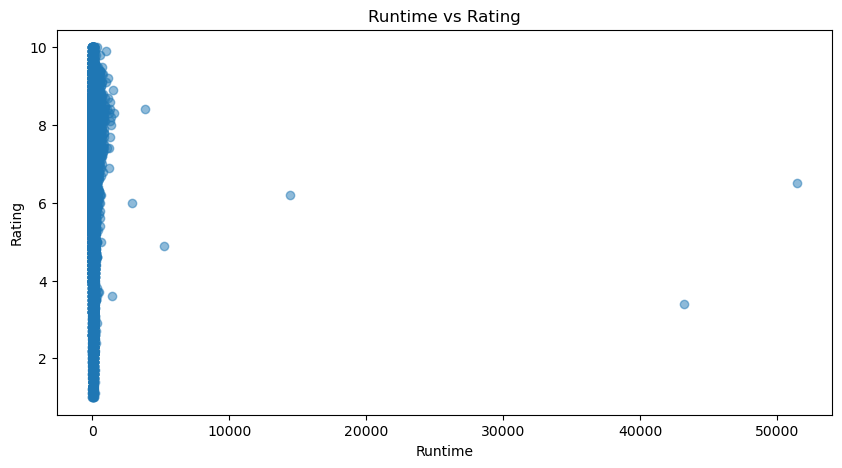

In [219]:
plt.figure(figsize=(10, 5))
plt.scatter(movie_frame['runtime'], movie_frame['rating'], alpha=0.5)
plt.title('Runtime vs Rating')
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.show()

In [220]:
movie_frame = movie_frame[movie_frame.runtime <= 300] #Removing outliers to ensure better clusters are formed 

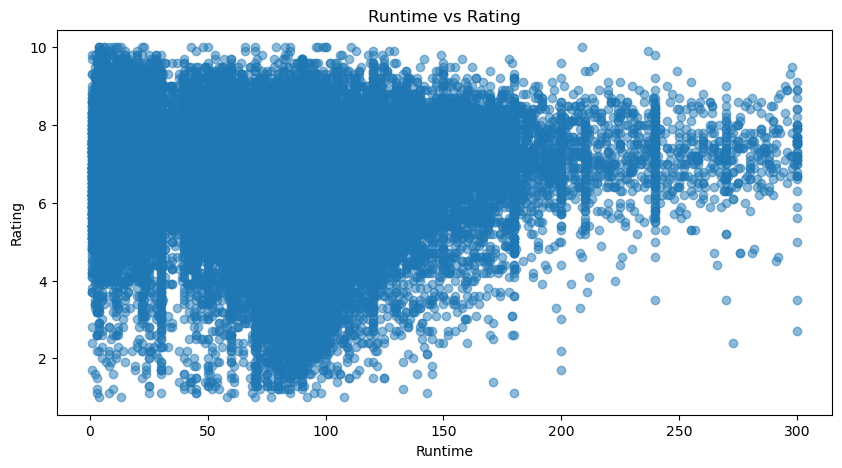

In [221]:
plt.figure(figsize=(10, 5))
plt.scatter(movie_frame['runtime'], movie_frame['rating'], alpha=0.5)
plt.title('Runtime vs Rating')
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.show() #Plotting newly filtered data 

In [222]:
features = movie_frame[['runtime', 'rating']]
import numpy as np

copied_features = features.copy() #Copying features and then applying log scale to help normalise the distribution

copied_features.iloc[:, 0] = np.log1p(copied_features.iloc[:, 0]) 



# Standardize the data
scaled_features = sc.fit_transform(copied_features)

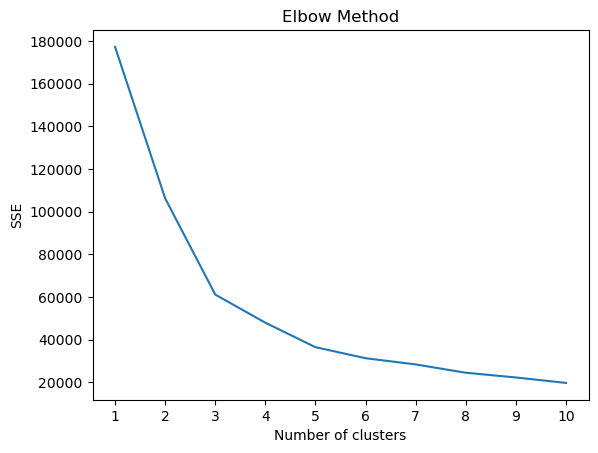

In [223]:
#Applying elbow method to determine appropriate number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_) #intertia helps quantify appropriate number of clusters 

# Plotting the elbow curve
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

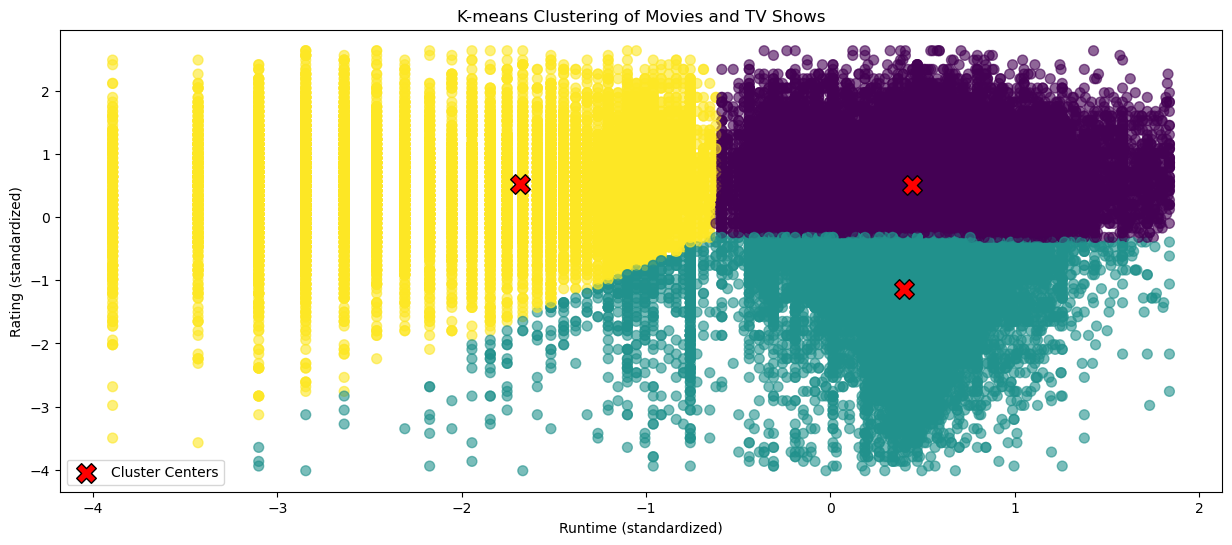

In [224]:
optimal_k = 3 #Based on above elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Retrieve cluster centers for the optimal k
cluster_centers = kmeans.cluster_centers_

# Plotting data points, different clusters identified by different colour 
plt.figure(figsize=(15, 6))
plt.scatter(x=scaled_features[:, 0], y=scaled_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6 )

# Plotting the cluster centers which are marked with red X's
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', edgecolor='black', label='Cluster Centers')

# Adding necessary labels and titles to the plot
plt.title('K-means Clustering of Movies and TV Shows')
plt.xlabel('Runtime (standardized)')
plt.ylabel('Rating (standardized)')
plt.legend()
plt.show()

Analysis

Here is the link to dataset: https://www.kaggle.com/datasets/gayu14/tv-and-movie-metadata-with-genres-and-ratings-imbd

The dataset chosen is one that contains many movies and tv shows. Numerical features within it include votes, rating. I modified runtime to a numerical feature by removing min as I wanted this to be one of the numerical features used. In terms of missing features, runtime and rating and votes had missing values. Since rating was dependent on votes, those rows with missing votes and missing runtimes were removed from the dataset. Two numerical features chosen for clustering was runtime and ratings. I wanted to identify interesting insights between how movie ratings are affected by their respective runtimes.

 Indeed, there was missing data for runtime, rating and votes. Notably, those columns with missing ratings also had missing votes values due to their dependence on votes. Resolving this issue was done by removing these missing values using dropna(). This was done instead of putting mean values, as doing the latter could skew the dataset because of a bias. In addition, I changed runtime into a numerical feature by removing the 'min' part as well as removing the '' which makes something a string. Finally, when visualising the scatter plot between runtime and rating, there were some huge outliers which added a lot of bias to the data. Resolving this was done by applying a filter for specific runtimes. This would allow better clusters to form.

 The two numerical features chosen were runtime and ratings. Before k-means clustering was performed, I used the elbow method to indentify the right amount of clusters which ended up being 3. Following this, I used KMeans function from sklearn.cluster. Also, because of variance in runtime values, a log scale was applied to help normalise the distribution. Following the performance of k-clustering, I then used pyplot from matplotlib to visualise the clustering.

 With the k-means clustering, both x (runtime) and y axis (rating) have been standardised. In terms of the specific clusters, yellow cluster is filled with movies and tv shows with very short runtimes yet variable ratings, as they span from low to high. The teal cluster represents content with medium-long runtimes but mostly lower ratings. Finally, the purple cluster represents content with longer runtimes but higher ratings. In terms of the cluster centers, which are represented with red crosses, the yellow cluster centere is positioned around the 0 standardised rating, which suggests diverse ratings. The purple cluster center is located on the right side of x-axis indicatinglonger runtimes yet is positioned above the standardised 0 of runtimes. This signifies average to higher than average ratings. Finally, the teal cluster center is again located to the right on x-axis but with a ratings coordinate below 0 meaning the average ratings for this cluster is below average. Thus, overall we can generate some insights from these clusters. Notably upon analysis of the yellow cluster, shorter runtimes for movies and tv shows are more variable in terms of quality and ratings. With regards to longer runtimes, generally longer runtimes are associated with higher ratings such as art films focused on winning awards, yet there is also the case where higher runtimes do not correspond to higher ratings as reflected with the teal cluster. Thus, applying k-means clustering to this dataset can help tv channels and even production companies in identifying patterns between runtime and ratings so they can consequently produce more optimal content. 